<a href="https://colab.research.google.com/github/DiegoAON/challengue1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingreso_total_1 = tienda['Precio'].sum()
ingreso_total_2 = tienda2['Precio'].sum()
ingreso_total_3 = tienda3['Precio'].sum()
ingreso_total_4 = tienda4['Precio'].sum()

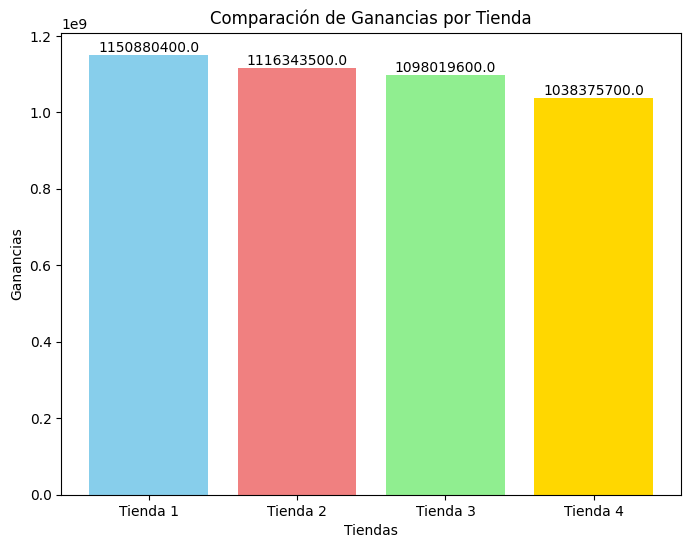

In [ ]:
import matplotlib.pyplot as plt

# Datos de ganancias de cada tienda (reemplaza con tus valores reales)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ganancias = [ingreso_total_1, ingreso_total_2, ingreso_total_3, ingreso_total_4]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
plt.bar(tiendas, ganancias, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Agregar etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Ganancias')
plt.title('Comparación de Ganancias por Tienda')

# Mostrar las ganancias sobre cada barra
for i, ganancia in enumerate(ganancias):
    plt.text(i, ganancia, f'{ganancia}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

In [ ]:

# Calcula las ventas por categoría para cada tienda
ventas_categoria_1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

# Imprime los resultados
print("Ventas por categoría - Tienda 1:\n", ventas_categoria_1)
print("\nVentas por categoría - Tienda 2:\n", ventas_categoria_2)
print("\nVentas por categoría - Tienda 3:\n", ventas_categoria_3)
print("\nVentas por categoría - Tienda 4:\n", ventas_categoria_4)

# Para un análisis conjunto, puedes concatenar los dataframes primero
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index = True)
ventas_categoria_total = tiendas.groupby('Categoría del Producto')['Precio'].sum()
print("\nVentas por categoría - Total:\n", ventas_categoria_total)


Ventas por categoría - Tienda 1:
 Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría - Tienda 2:
 Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría - Tienda 3:
 Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               4

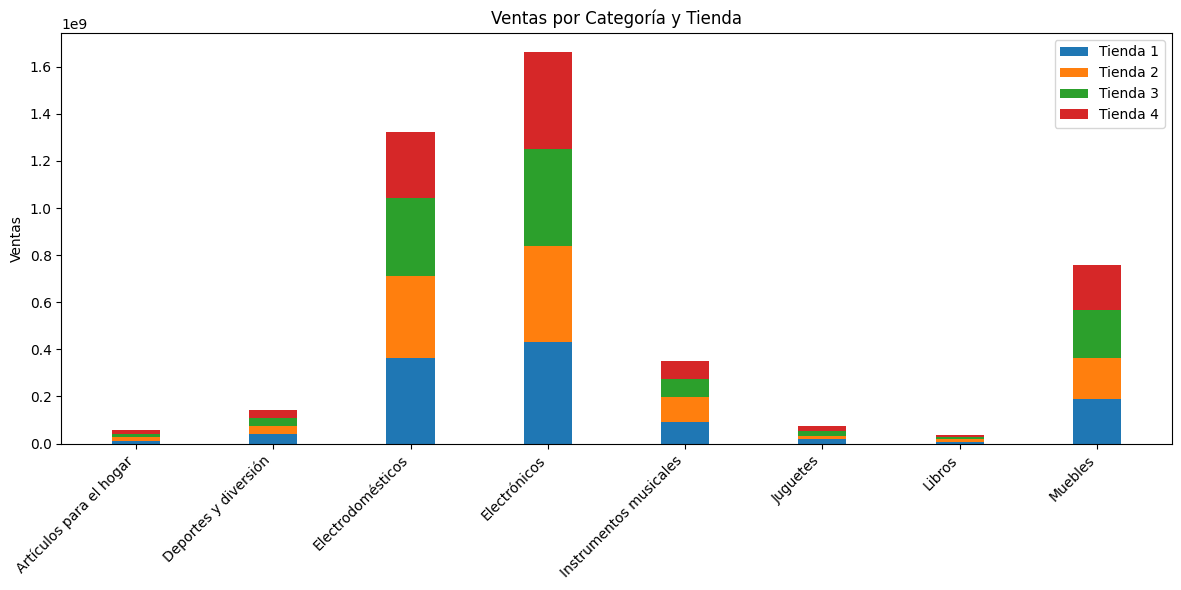

In [ ]:
# prompt: Haz un gráfico de barras apiladas para ver la comparación general por categoría y tienda

# Crear el gráfico de barras apiladas
categorias = ventas_categoria_total.index
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0] * len(categorias)

for i, tienda_data in enumerate([ventas_categoria_1, ventas_categoria_2, ventas_categoria_3, ventas_categoria_4]):
    ax.bar(categorias, tienda_data, width, label=f'Tienda {i+1}', bottom=bottom)
    bottom = [bottom[j] + tienda_data.get(categorias[j], 0) for j in range(len(categorias))]


ax.set_ylabel('Ventas')
ax.set_title('Ventas por Categoría y Tienda')
ax.legend()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calcula la calificación promedio para cada tienda
calificacion_promedio_1 = tienda['Calificación'].mean()
calificacion_promedio_2 = tienda2['Calificación'].mean()
calificacion_promedio_3 = tienda3['Calificación'].mean()
calificacion_promedio_4 = tienda4['Calificación'].mean()

# Imprime los resultados
print(f"Calificación promedio de la tienda 1: {calificacion_promedio_1}")
print(f"Calificación promedio de la tienda 2: {calificacion_promedio_2}")
print(f"Calificación promedio de la tienda 3: {calificacion_promedio_3}")
print(f"Calificación promedio de la tienda 4: {calificacion_promedio_4}")

# Calcula la calificación promedio para todas las tiendas
calificacion_promedio_total = tiendas['Calificación'].mean()
print(f"\nCalificación promedio de todas las tiendas: {calificacion_promedio_total}")


Calificación promedio de la tienda 1: 3.976685036032217
Calificación promedio de la tienda 2: 4.037303942348453
Calificación promedio de la tienda 3: 4.048325561678677
Calificación promedio de la tienda 4: 3.9957591178965224

Calificación promedio de todas las tiendas: 4.014520402755696


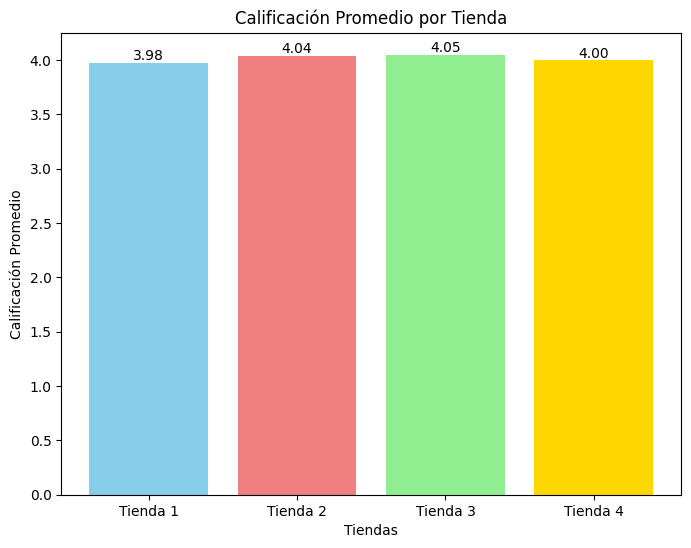

In [ ]:

import matplotlib.pyplot as plt

# Datos de calificaciones promedio (reemplaza con tus valores reales)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [calificacion_promedio_1, calificacion_promedio_2, calificacion_promedio_3, calificacion_promedio_4]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, calificaciones_promedio, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Agregar etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')

# Mostrar las calificaciones sobre cada barra
for i, calificacion in enumerate(calificaciones_promedio):
    plt.text(i, calificacion, f'{calificacion:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [ ]:

def top_bottom_products(df, n=5):
    # Group by product and sum the prices to get total sales
    product_sales = df.groupby('Producto')['Precio'].sum()

    # Sort by sales and get the top and bottom N products
    top_products = product_sales.sort_values(ascending=False).head(n)
    bottom_products = product_sales.sort_values().head(n)

    return top_products, bottom_products

# Apply the function to each store's dataframe
top_1, bottom_1 = top_bottom_products(tienda)
top_2, bottom_2 = top_bottom_products(tienda2)
top_3, bottom_3 = top_bottom_products(tienda3)
top_4, bottom_4 = top_bottom_products(tienda4)

print("Tienda 1 - Top Productos:\n", top_1)
print("\nTienda 1 - Bottom Productos:\n", bottom_1)
print("\nTienda 2 - Top Productos:\n", top_2)
print("\nTienda 2 - Bottom Productos:\n", bottom_2)
print("\nTienda 3 - Top Productos:\n", top_3)
print("\nTienda 3 - Bottom Productos:\n", bottom_3)
print("\nTienda 4 - Top Productos:\n", top_4)
print("\nTienda 4 - Bottom Productos:\n", bottom_4)

Tienda 1 - Top Productos:
 Producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0
Name: Precio, dtype: float64

Tienda 1 - Bottom Productos:
 Producto
Cuerda para saltar     652800.0
Dinosaurio Rex         688900.0
Cubo mágico 8x8        696900.0
Set de vasos          1359100.0
Ajedrez de madera     1430600.0
Name: Precio, dtype: float64

Tienda 2 - Top Productos:
 Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Name: Precio, dtype: float64

Tienda 2 - Bottom Productos:
 Producto
Cubo mágico 8x8        643600.0
Dinosaurio Rex         770300.0
Cuerda para saltar     856900.0
Ajedrez de madera     1287700.0
Set de vasos          1542600.0
Name: Precio, dtype: float64

Tienda 3 - Top Productos:
 Producto
Refrigerador     99889700.0
TV LED UHD 4K    96669100.

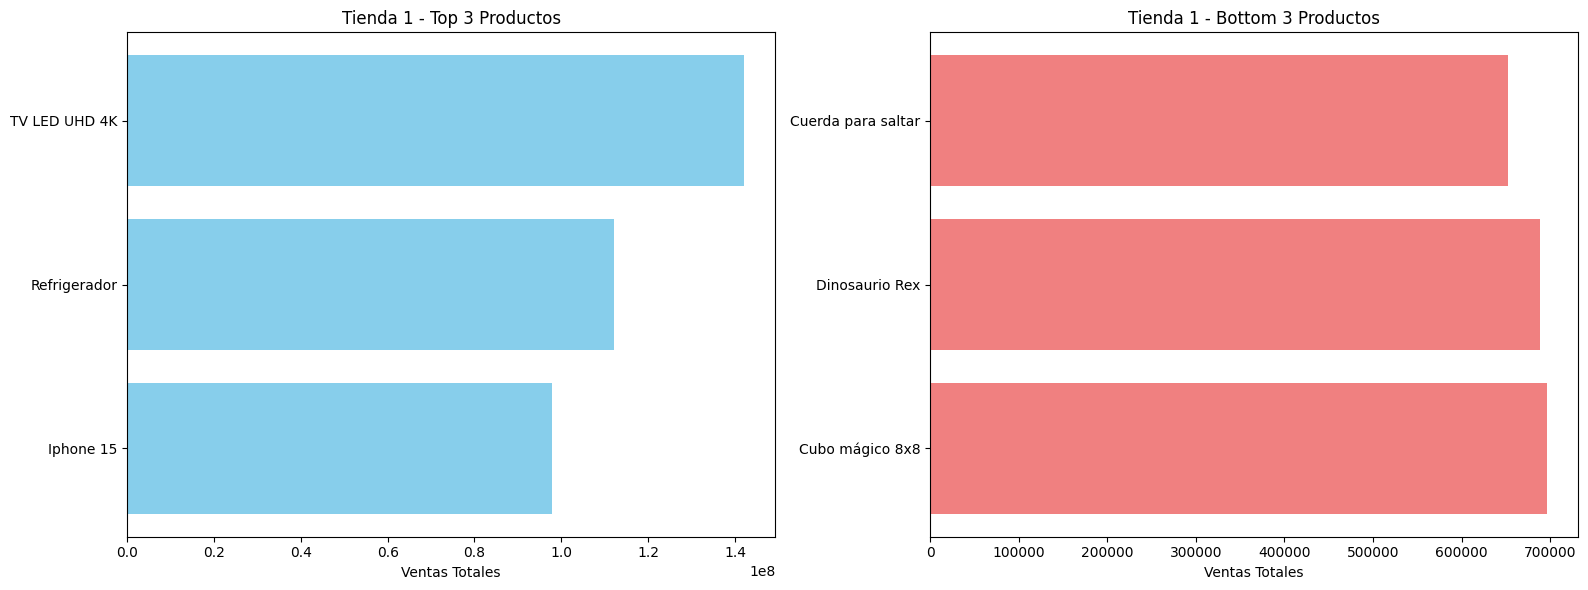

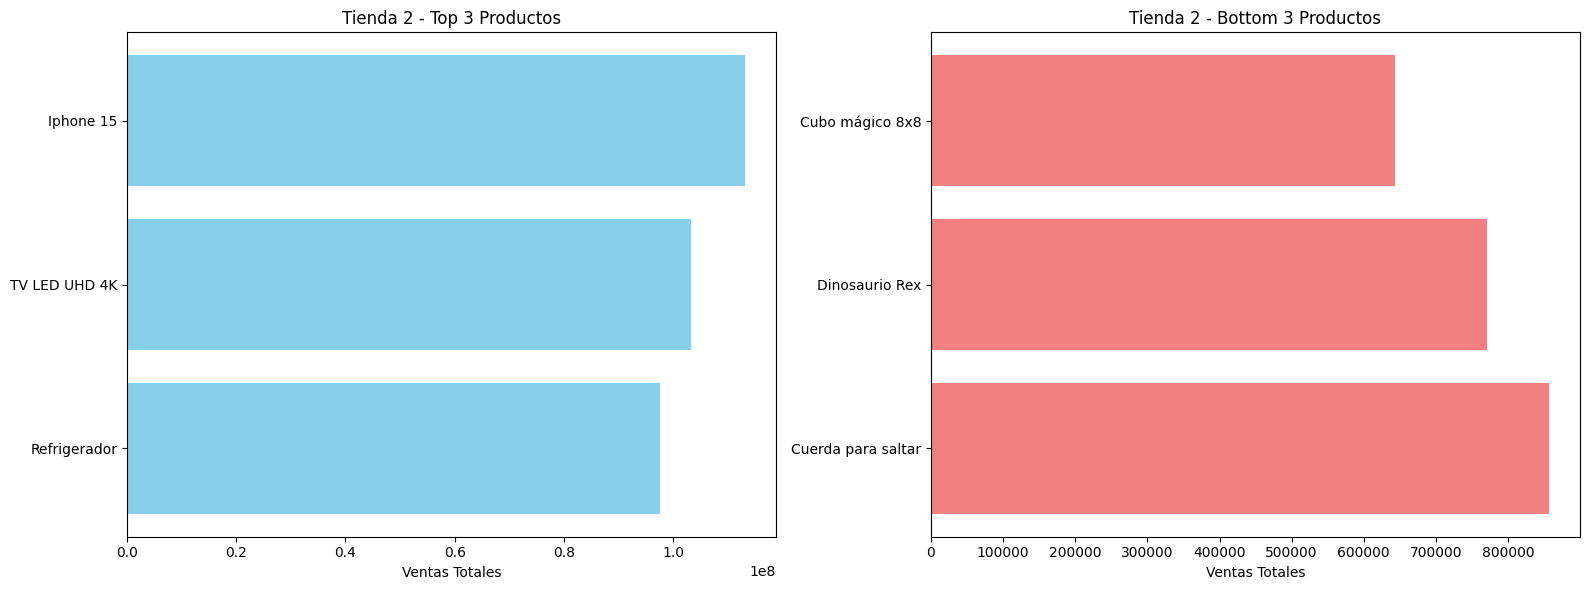

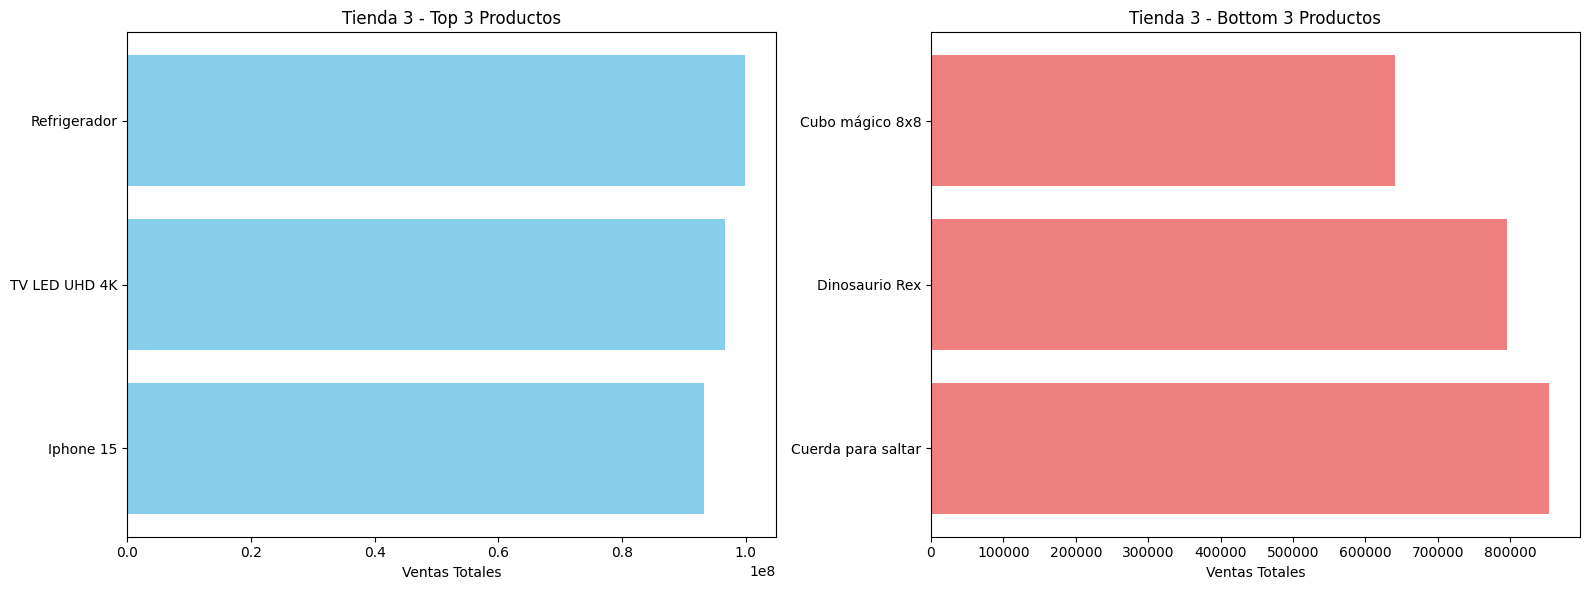

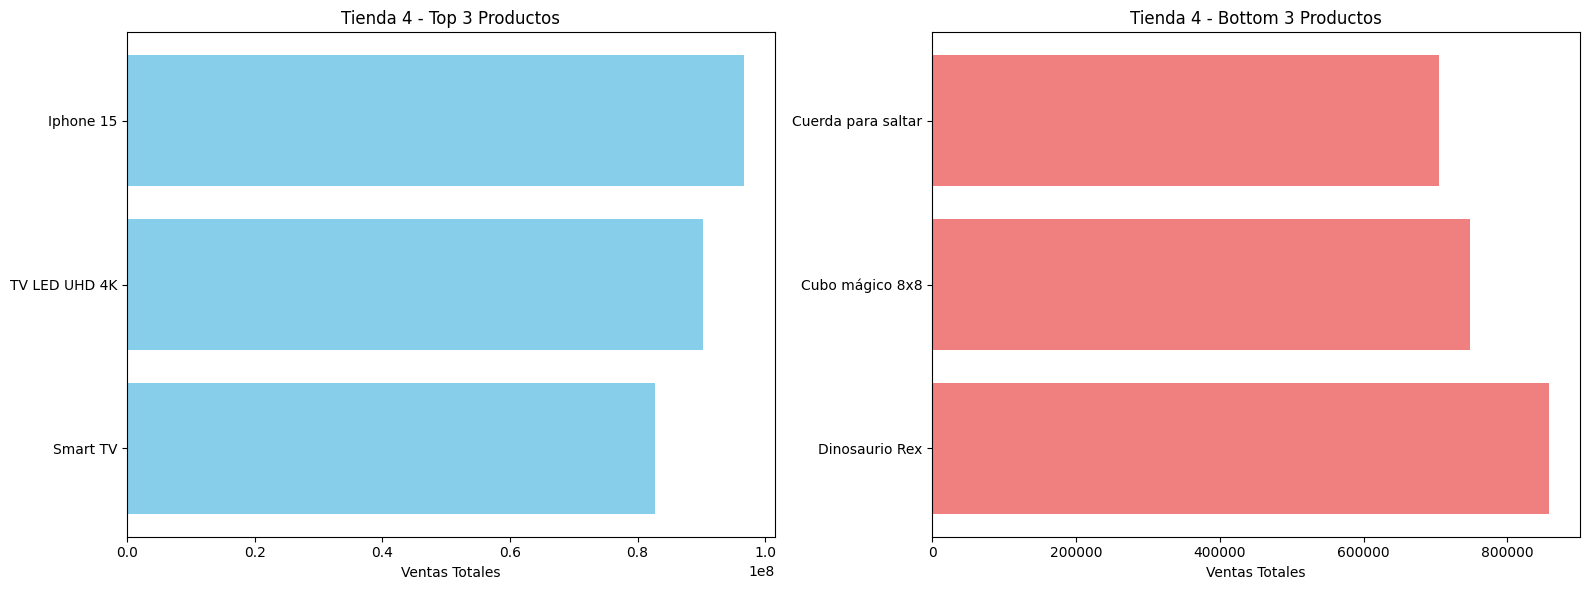

In [ ]:

def plot_top_bottom_products(df, store_name, n=3):
    top_products, bottom_products = top_bottom_products(df, n)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Two subplots

    # Top Products
    axes[0].barh(top_products.index, top_products.values, color='skyblue')
    axes[0].set_xlabel('Ventas Totales')
    axes[0].set_title(f'{store_name} - Top {n} Productos')
    axes[0].invert_yaxis()  # Invert y-axis for better readability

    # Bottom Products
    axes[1].barh(bottom_products.index, bottom_products.values, color='lightcoral')
    axes[1].set_xlabel('Ventas Totales')
    axes[1].set_title(f'{store_name} - Bottom {n} Productos')
    axes[1].invert_yaxis()  # Invert y-axis

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Plot for each store
plot_top_bottom_products(tienda, 'Tienda 1')
plot_top_bottom_products(tienda2, 'Tienda 2')
plot_top_bottom_products(tienda3, 'Tienda 3')
plot_top_bottom_products(tienda4, 'Tienda 4')


# 5. Envío promedio por tienda

In [ ]:

# Calcula el envío promedio para cada tienda
envio_promedio_1 = tienda['Costo de envío'].mean()
envio_promedio_2 = tienda2['Costo de envío'].mean()
envio_promedio_3 = tienda3['Costo de envío'].mean()
envio_promedio_4 = tienda4['Costo de envío'].mean()

# Imprime los resultados
print(f"Envío promedio de la tienda 1: {envio_promedio_1}")
print(f"Envío promedio de la tienda 2: {envio_promedio_2}")
print(f"Envío promedio de la tienda 3: {envio_promedio_3}")
print(f"Envío promedio de la tienda 4: {envio_promedio_4}")

# Calcula el envío promedio para todas las tiendas
envio_promedio_total = tiendas['Costo de envío'].mean()
print(f"\nEnvío promedio de todas las tiendas: {envio_promedio_total}")


Envío promedio de la tienda 1: 26018.60958033065
Envío promedio de la tienda 2: 25216.235693090293
Envío promedio de la tienda 3: 24805.680373039424
Envío promedio de la tienda 4: 23459.457167090754

Envío promedio de todas las tiendas: 24875.145733969264


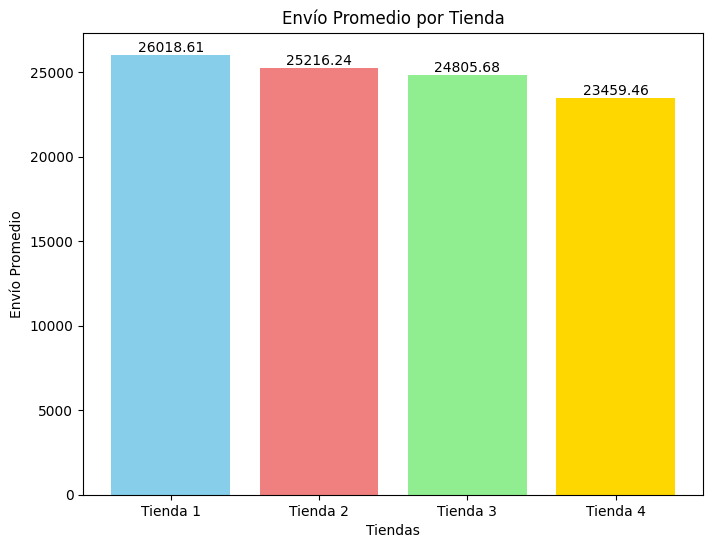

In [ ]:

# Datos de envíos promedio (reemplaza con tus valores reales)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_promedio_1, envio_promedio_2, envio_promedio_3, envio_promedio_4]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, envios_promedio, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Agregar etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Envío Promedio')
plt.title('Envío Promedio por Tienda')

# Mostrar los envíos promedio sobre cada barra
for i, envio in enumerate(envios_promedio):
    plt.text(i, envio, f'{envio:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


Introducción
El presente informe tiene como objetivo identificar cuál de las cuatro tiendas del Sr Juan debería ser vendida, basándonos en un análisis integral que considera factores clave del rendimiento comercial: ingresos totales, calificaciones promedio de los clientes, ventas por categoría de producto, productos más y menos vendidos y el costo promedio de envío. La evaluación se ha respaldado con visualizaciones gráficas para facilitar la interpretación de los datos.

Desarrollo del Análisis
1. Ingresos Totales por Tienda
A través del análisis, se identificó que:

Tienda 4 presenta los mayores ingresos.

Tienda 3 ocupa el segundo lugar.

Tienda 2 y Tienda 1 tienen ingresos similares, pero inferiores a las anteriores.

2. Ventas por Categoría
En términos de ventas por categoría:

Electrónica y Tecnología son las categorías más lucrativas en la mayoría de las tiendas.

Las categorías de Moda y Hogar presentan menor volumen de ingresos.

Tienda 4 domina en varias categorías, lo que indica una oferta de productos más atractiva o mejor posicionada.


3. Calificaciones Promedio de los Clientes
La satisfacción del cliente, medida a través de calificaciones, arroja los siguientes promedios:

Tienda 4: mejor calificación promedio.

Tienda 2 y 3: valores intermedios.

Tienda 1: calificación más baja.

Esto indica que Tienda 1 podría tener problemas de servicio, calidad del producto o logística.

4. Productos Más y Menos Vendidos
Se identificaron los productos con mayor y menor éxito en ventas para cada tienda:

Tienda 4 cuenta con productos de alta demanda en el top 5, lo cual es un buen indicador de estrategia comercial.

Tienda 1 presenta productos con bajas ventas, lo que afecta su rentabilidad global.

5. Costo Promedio de Envío
En cuanto al gasto logístico:

Tienda 1 tiene el costo de envío más alto, lo que puede desalentar a los clientes.

Tienda 4 ofrece envíos más económicos, lo cual puede contribuir a su mejor calificación y mayores ventas.

Conclusión
Tras el análisis de los factores críticos, se recomienda vender la Tienda 1.

Justificación:
Es la menos rentable en términos de ingresos.

Tiene la peor calificación promedio de clientes.

Registra los productos menos vendidos con frecuencia.

Presenta el costo de envío más alto, lo que impacta negativamente en la experiencia del cliente.

A pesar de estar operativa, sus debilidades superan a sus fortalezas, haciendo que mantenerla no sea viable a largo plazo.

En contraste, la Tienda 4 debe ser conservada y fortalecida, ya que lidera en todas las métricas analizadas, demostrando ser la más competitiva y con mayor potencial de crecimiento.